<a href="https://colab.research.google.com/github/RishabParuchuri/Sunspot-Risk-Assessment/blob/main/Solar_Flare_Risk_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solar Flare Risk Assessment
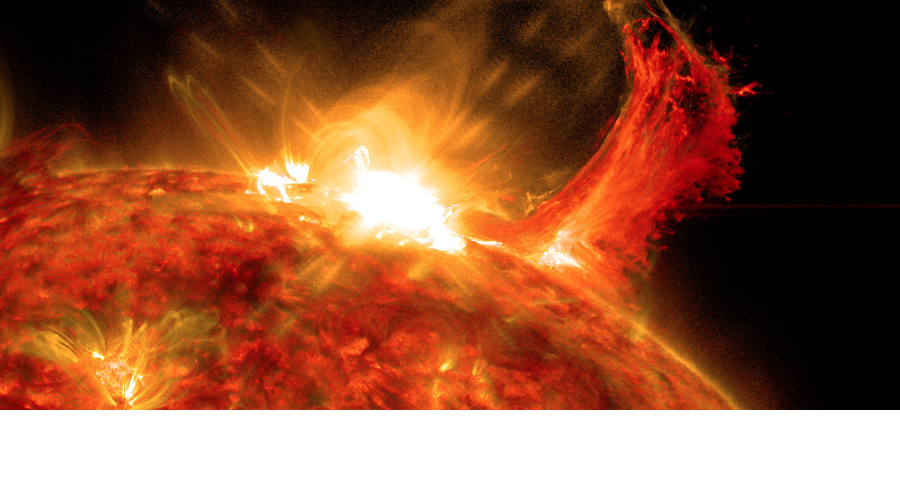

## **Aim of the investigation**

The aim of this investigation was to model the periodic change of the number of sunspots with a trigonometric function, and therefore calculate the risk of solar flares at any given point in time.


---
## **Methodology**

In the investigation I used python data science libraries such as scipy, numpy, pandas and matplotlib to construct a model to calculate the risk of solar flares using my own scale: The Rishab Solar Flare Screwup Scale (RSFSS).

 
> *Database from SIDC - Solar Influences Data Analysis Center - the solar physics research department of the Royal Observatory of Belgium.*

> ### What are sunspots?

Sunspots are dark, planet-sized regions that appear on the "surface" of the Sun. Sunspots are "dark" because they are cooler than their surroundings. A large sunspot might have a central temperature of 4,000 K (about 3,700° C or 6,700° F), much lower than the 5,800 K (about 5,500° C or 10,000° F) temperature of the adjacent photosphere.

> ### Cause and effects

They are caused by disturbances in the Sun's magnetic field welling up to the photosphere, the Sun's visible "surface". The powerful magnetic fields in the vicinity of sunspots produce active regions on the Sun, which in turn frequently spawn disturbances such as solar flares and coronal mass ejections (CMEs). Because sunspots are associated with solar activity, space weather forecasters track these features in order to help predict outbursts of "solar storms". In this investigation, it is assumed that the number of sunspots is directly proportional to the risk of a solar flare.

> ### Impact on humanity

Although, solar flares are high radiations, this phenomenon is not dangerous to humans on the surface of the earth. The geomagnetic storm could have a technological impact on the man-made power grids and satellites, but not cause any effect to humans. Earlier in 1989, a strong solar eruption caused the Canadian Province of Quebec to lose power for nine hours, showcasing how big an effect it could have.

### **Retrieving the Data**
The dataset contained monthly averages of the number of sunspots since the year 1749. The sunspot data came in the form of a csv file, and therefore, I had to upload it onto my github account where I could create a url link for the raw data. After doing this, I placed the data in a pandas dataframe. The dataset had 3625 rows and 3 columns: 


1.   An unnamed one (Serial Number)
2.   Date
3.   Monthly Mean Total Sunspot Number




In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
from scipy.stats import gaussian_kde

In [61]:
# Retrieving database from my github account and putting it in a pandas dataframe
url = "https://raw.githubusercontent.com/RishabParuchuri/Sunspot-Risk-Assessment/main/Sunspots.csv"
df = pd.read_csv(url)

In [62]:
# Here is the original dataset
df

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8


### **Cleaning and organising the data**
I cleaned up the data by deleting the "Unnamed" column and adding two new ones: 


1.   Months after
2.   Years after

This allowed me to model my function in either the months after 1749 ($m$) or the years after 1749 ($t$) where

$$t = \frac{m}{12}$$


In [63]:
df['Months After'] = np.arange(len(df))
df['Years After'] = df['Months After']/12
df = df.drop('Unnamed: 0', axis=1)

In [64]:
df.head(13)

,Date,Monthly Mean Total Sunspot Number,Months After,Years After
0,1749-01-31,96.7,0,0.000000
1,1749-02-28,104.3,1,0.083333
2,1749-03-31,116.7,2,0.166667
3,1749-04-30,92.8,3,0.250000
4,1749-05-31,141.7,4,0.333333
5,1749-06-30,139.2,5,0.416667
6,1749-07-31,158.0,6,0.500000
7,1749-08-31,110.5,7,0.583333
8,1749-09-30,126.5,8,0.666667
9,1749-10-31,125.8,9,0.750000


### **Visualizing the data**
After cleaning the data, I wanted to visualize it to gain a better understanding of the periodicity. I used the matplotlib python library to plot a scattter plot of all the data points. I plotted two graphs:

1.   As a function of months
2.   As a function of years

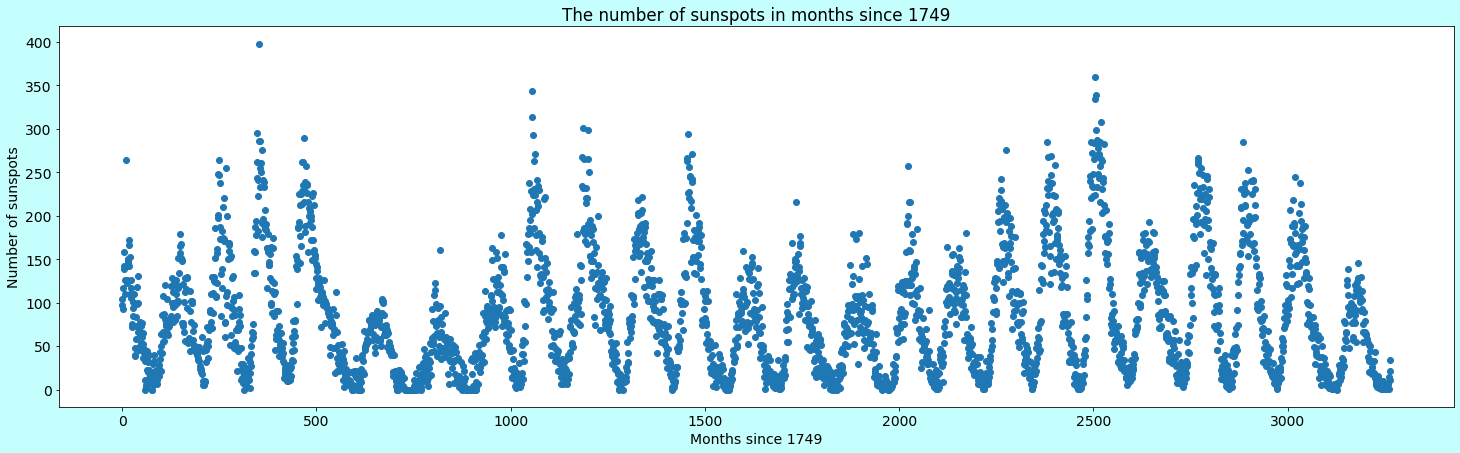

In [65]:
# This is as a function of months
plt.rcParams["figure.figsize"] = [25, 7]
plt.rcParams.update({'font.size': 14})
plt.figure(facecolor='#c4fffd')
df["Monthly Mean Total Sunspot Number"]
plt.scatter(df["Months After"], df["Monthly Mean Total Sunspot Number"])
plt.xlabel("Months since 1749")
plt.ylabel("Number of sunspots")
plt.title("The number of sunspots in months since 1749")
plt.show()

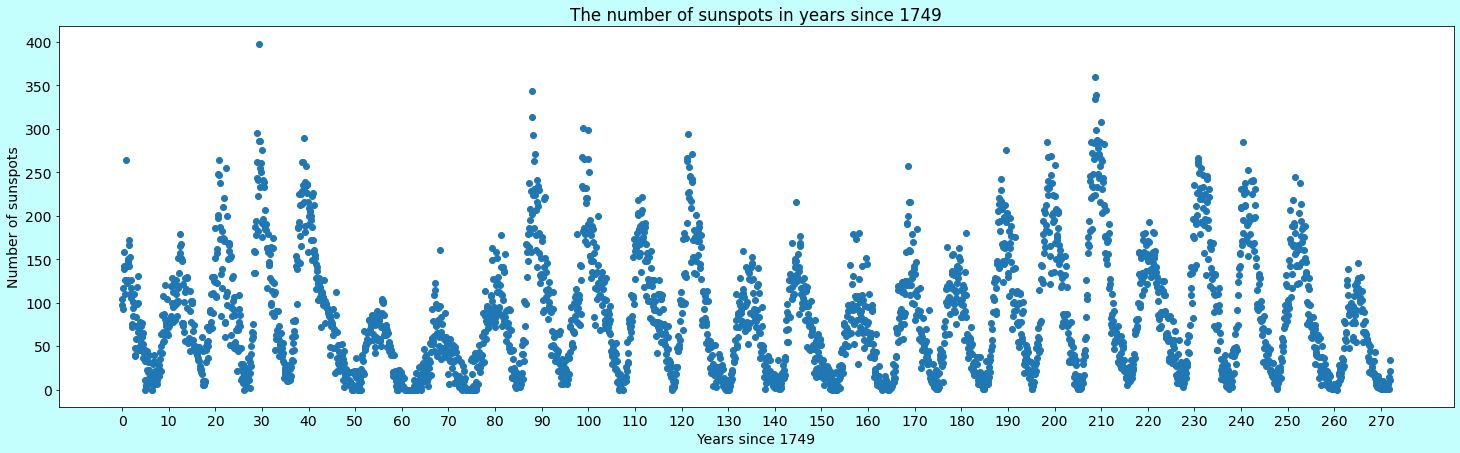

In [66]:
# This is as a function of years
plt.rcParams["figure.figsize"] = [25, 7]
plt.rcParams.update({'font.size': 14})
plt.figure(facecolor='#c4fffd')
xinterval = np.arange(0,280,10) 
plt.xticks(xinterval)
df["Monthly Mean Total Sunspot Number"]
plt.scatter(df["Years After"], df["Monthly Mean Total Sunspot Number"])
plt.xlabel("Years since 1749")
plt.ylabel("Number of sunspots")
plt.title("The number of sunspots in years since 1749")
plt.show()

### **Using Gaussian Kernal Density Estimation to show the Density of the Scatter plot**
Since the dataset had 3265 points, it was hard to see all of them as they clustered up together. To fix this, I used Gaussian Kernal Density Estimation (gaussian_kde) to show the density of the scatter plot. Gaussian KDE works well with 2 numerical variables with a lot of data points. It considers the number of points on each part of the plotting area and thus calculates a 2D kernel density estimate. It is like a smoothed histogram. Instead of a point falling into a particular bin, it adds a weight to surrounding bins.


> **The scatter plot below shows the density of the data points. The lighter the color, the more dense the data points.**


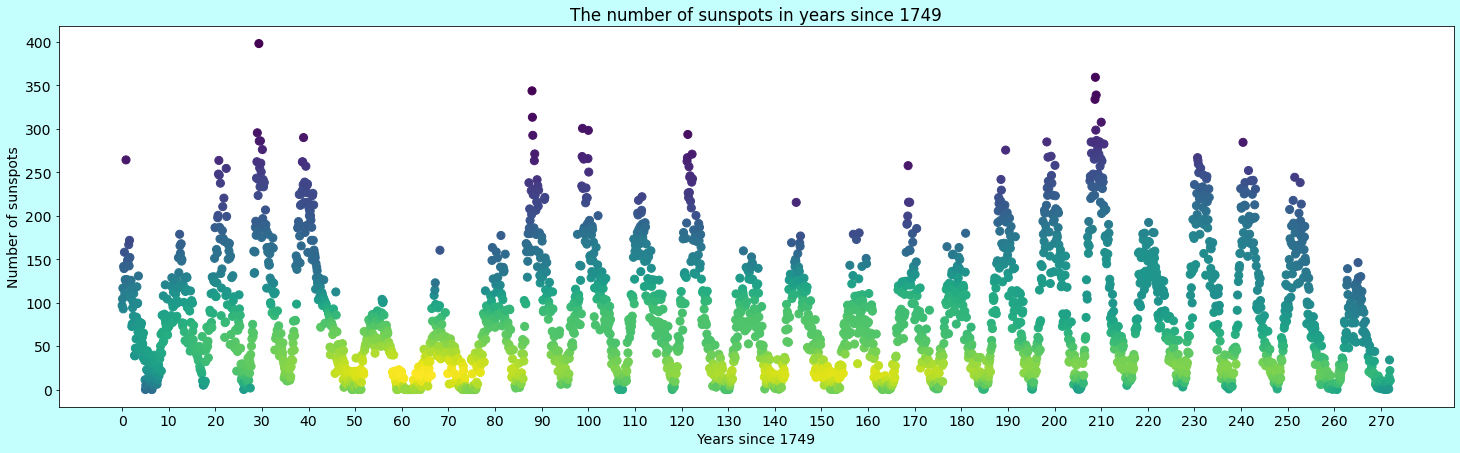

In [67]:
plt.rcParams["figure.figsize"] = [25, 7]
plt.rcParams.update({'font.size': 14})
plt.figure(facecolor='#c4fffd')

xinterval = np.arange(0,280,10) 
plt.xticks(xinterval)

xy = np.vstack([df["Years After"],df["Monthly Mean Total Sunspot Number"]])
z = gaussian_kde(xy)(xy)

df["Monthly Mean Total Sunspot Number"]
plt.scatter(df["Years After"], df["Monthly Mean Total Sunspot Number"], c=z**0.7, s=65)
plt.xlabel("Years since 1749")
plt.ylabel("Number of sunspots")
plt.title("The number of sunspots in years since 1749")

plt.show()

### **SciPy Optimizer**

In order to model the function I used the Scipy optimizer. Scipy is the scientific computing module of Python providing in-built functions on a lot of well-known Mathematical functions. The scipy.optimize package is equipped with with multiple optimization procedures. Curve fitting is a type of optimization that finds an optimal set of parameters for a defined function that best fits a given set of observations.


---


### **Estimations of the function**

In order for the optimizer to work efficiently, it needs intital guesses of the parameters (amplitude, midpoint, shift, period). In order to produce these approximations, I used a variety of mathematical methods. They are listed below:

---
####**Amplitude**
To approximate the amplitude, I used the root mean square amplitude formula where the amplitude is calculated using the following formula

$$A= \frac{A_{RMS}}{\sqrt{2}}$$

The root mean square amplitude is calculated using the following formula with $x_{i}$ being the Monthly Mean Total Sunspot Number and $n$ being the number of data points.

$$ A_{RMS} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_{i}^2} $$

**Using the formulas, I got a value of 106.27939717273385**

---
####**Period**

To approximate the period, I used a one dimensional Fast Fourier Transform. This will calculate the angular frequency of the function and from there I can use the following function to calculate the time period:

$$T = \frac{2π}{ω}$$

**After the Fast Fourier Transform, I got a value of 0.5773217740134383 for the angular frequency**

**After using the formula above, I got a value of 10.883333333333333 for the time period.**

---
####**Midpoint**
To approximate the midpoint, I took the arithmetic mean of all the data points. Since there is a total of 3265 data points, taking the mean of all the values gives an estimation of midpoint. The aritmetic mean $A$ is as show below where $x_{i}$ represents the Monthly Mean Total Sunspot Number and $n$ represents the number of data points.

$$ A = \frac{1}{n} \sum_{i=1}^{n} x_{i} $$

**Using the formula, I got a value of 81.77877488514558**


---
####**Shift**

I did not calculate the shift value as it was less important than the other parameters in determining the function







### **Here is the graph of my approximate function**


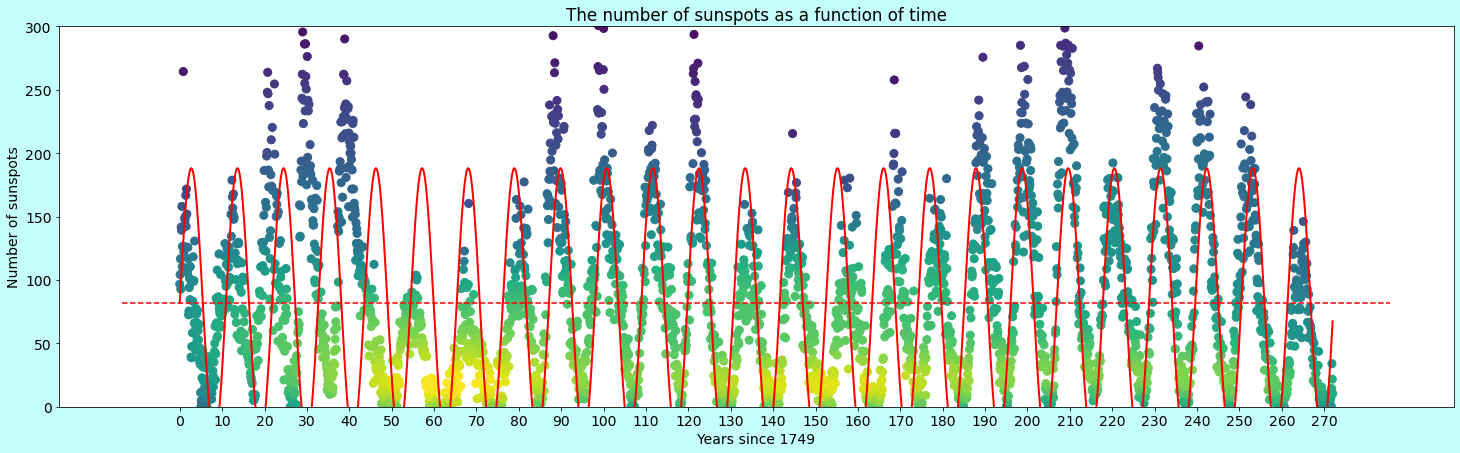

In [68]:
plt.rcParams["figure.figsize"] = [25, 7]
plt.rcParams.update({'font.size': 14})
plt.figure(facecolor='#c4fffd')

xinterval = np.arange(0,280,10) 
plt.xticks(xinterval)

ax = plt.gca()
ax.set_ylim([0, 300])

xy = np.vstack([df["Years After"],df["Monthly Mean Total Sunspot Number"]])
z = gaussian_kde(xy)(xy)


plt.scatter(df["Years After"], df["Monthly Mean Total Sunspot Number"], c=z**0.7, s=65)

ap = df["Years After"]
fitfunce = lambda ap: 106.3 * np.sin(0.577*ap) + 81.78
plt.plot(df["Years After"], fitfunce(df["Years After"]), "r-", label="y fit curve", linewidth=2)
abline(0, 81.82)
plt.xlabel("Years since 1749")
plt.ylabel("Number of sunspots")
plt.title("The number of sunspots as a function of time")
plt.show()


### **Evaluating my function**

The approximate function did a good job of modeling the data, but there were problems. First of all, since I did not calculate the shift, the predicted sine wave was slightly shifted to the left of the data. Another problem was the overestimation of the amplitude. Although the amplitude looks consistent with the data, a lot of the data points are more concentrated in the lower half. By using RMS, the data points that were further from the midpoint are amplified which, in turn, increased the amplitude.

### **After using the SciPy Optimizer**
With the optimizer, I was able to gain more accurate values for the variables in the sinsoidal wave equation.

*  **Amplitude = 46.79187443091003**
*  **Angular frequency = 0.5710474010676966**
*  **Shift = 0.9622057286320136**
*  **Midpoint = 81.81724181410699**

Using the following equation, where $ω$ is the angular frequency and $T$ is the time period, I calculated the time period of one "solar cycle".

$$T = \frac{2π}{ω}$$

*  **Time Period = 11.002913760629701** 

Using the above data, I used the sin wave function below to model the number of sunspots $t$ years after 1749 represented by $S(t)$.

## $$ S(t) = 46.79\sin (0.5710x + 0.9622) + 81.82$$

By graphing this function against the scatterplot 

In [69]:
def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

In [70]:
res = fit_sin(df["Years After"], df["Monthly Mean Total Sunspot Number"])
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

print(2.*np.pi/res['omega'])

Amplitude=46.79187443091003, Angular freq.=0.5710474010676966, phase=0.9622057286320136, offset=81.81724181410699, Max. Cov.=2.136786666825443
11.002913760629701


In [71]:
# Code to graph a straight line (I used it for midpoint of sin function)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color="red")

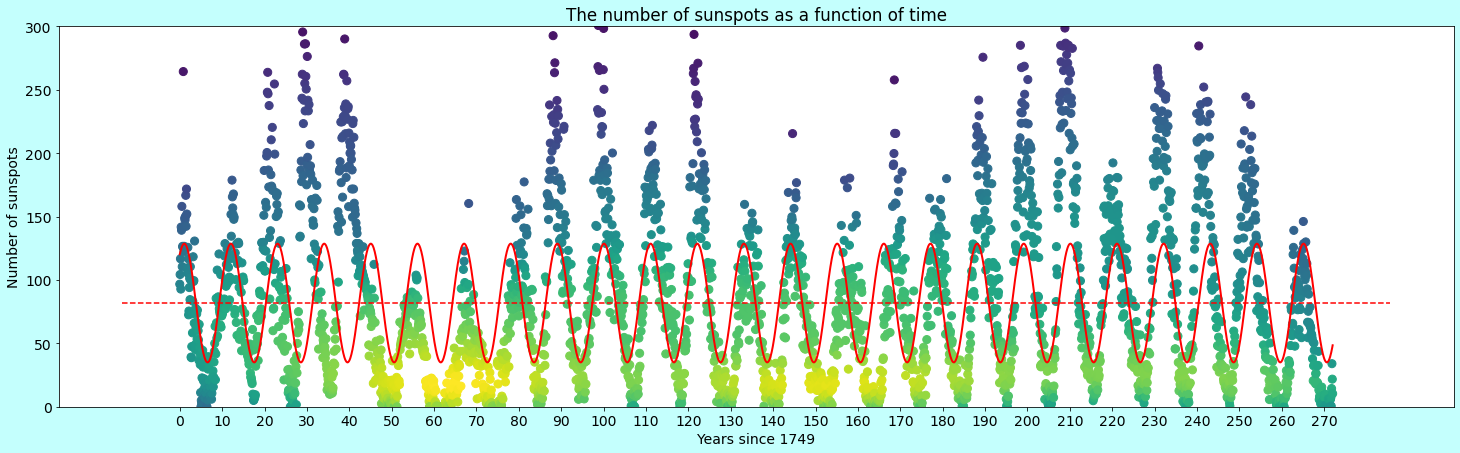

In [72]:
plt.rcParams["figure.figsize"] = [25, 7]
plt.rcParams.update({'font.size': 14})
plt.figure(facecolor='#c4fffd')

xinterval = np.arange(0,280,10) 
plt.xticks(xinterval)

ax = plt.gca()
ax.set_ylim([0, 300])

xy = np.vstack([df["Years After"],df["Monthly Mean Total Sunspot Number"]])
z = gaussian_kde(xy)(xy)


plt.scatter(df["Years After"], df["Monthly Mean Total Sunspot Number"], c=z**0.7, s=65)

# lll = df["Years After"]
# fitfunce = lambda lll: 46.79 * np.sin(0.5710*lll + 0.9622) + 81.82
# plt.plot(df["Years After"], fitfunce(df["Years After"]), "r-", label="y fit curve", linewidth=2)
plt.plot(df["Years After"], res["fitfunc"](df["Years After"]), color="red", label="y fit curve", linewidth=2)
abline(0, 81.82)
plt.xlabel("Years since 1749")
plt.ylabel("Number of sunspots")
plt.title("The number of sunspots as a function of time")
plt.show()

### **The Rishab Solar Flare Screwup Scale**
The Rishab Solar Flare Screwup Scale produces a number from 0 to 100 that reflects the threat of solar flares to communication systems. The scale is based on the assumption that the number of sunspots is directly proportional to the probability of a solar flare. It is calculated by changing the amplitude and midpoint of the function to 50. Applying this to my model, I get the following function:

## $$ RSFSS(t) = 50 \sin (0.5710x + 0.9622) + 50$$


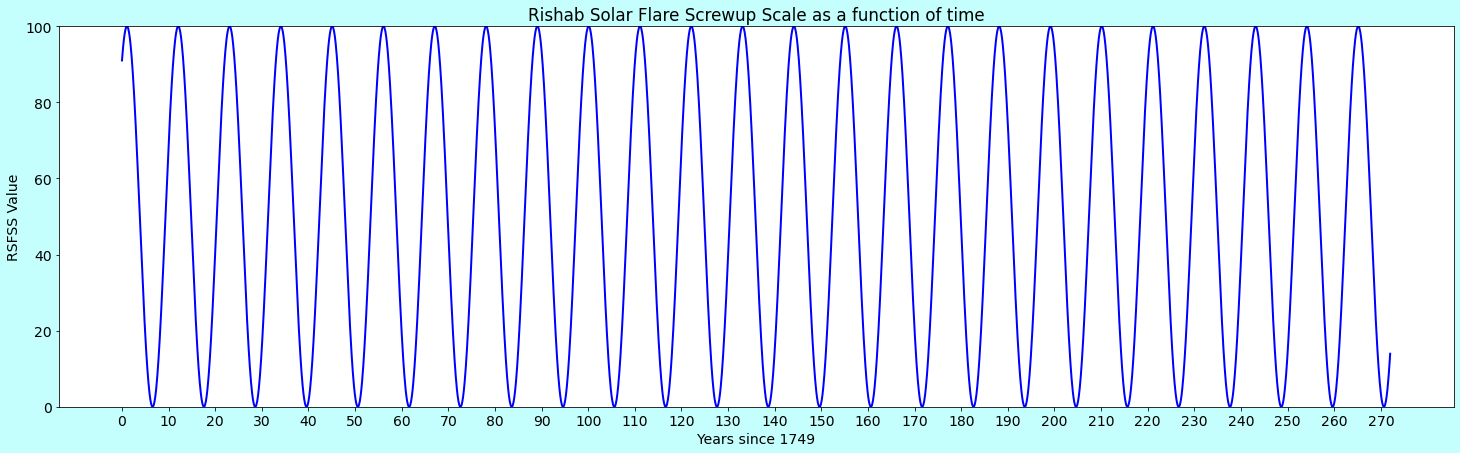

In [73]:
plt.rcParams["figure.figsize"] = [25, 7]
plt.rcParams.update({'font.size': 14})
plt.figure(facecolor='#c4fffd')

xinterval = np.arange(0,280,10) 
plt.xticks(xinterval)

ax = plt.gca()
ax.set_ylim([0, 100])
lll = df["Years After"]
fitscale = lambda lll: 50 * np.sin(0.5710*lll + 0.9622) + 50
plt.plot(df["Years After"], fitscale(df["Years After"]), color="blue", label="y fit curve", linewidth=2)
plt.xlabel("Years since 1749")
plt.ylabel("RSFSS Value")
plt.title("Rishab Solar Flare Screwup Scale as a function of time")
plt.show()



### **Sunspot Number and RSFSS calculator**

To finish my investigation, I created a calculator that will tell you the predicted number of sunspots and the RSFSS value at a specific time given by the user.

In [74]:
def getTime(date):
  year, month, day = date.split('-')
  totalTime = int(year) - 1749 + int(month) / 12 + int(day) / 365
  return totalTime

### **Here is the calculator:**

In [75]:
Date = '2216-01-14' #@param {type:"date"}
timePast = getTime(Date)
currentNumberofSunspots = res["fitfunc"](timePast)
currentRSFSS = round(fitscale(timePast), 1)
print("The estimated number of sunspots in " + Date + " is " + str(int(currentNumberofSunspots)) + " and the Rishab Solar Flare Screwup Scale value is " + str(currentRSFSS))

The estimated number of sunspots in 2216-01-14 is 52 and the Rishab Solar Flare Screwup Scale value is 19.6
